#  Python百度文库爬虫之ppt文件

对于文件的所有类型，我都会用一篇文章进行说明，链接：

1. [Python百度文库爬虫之txt文件](https://blog.csdn.net/V_lq6h/article/details/105794291)
2. [Python百度文库爬虫之doc文件](https://blog.csdn.net/V_lq6h/article/details/105800177)
3. Python百度文库爬虫之pdf文件
4. Python百度文库爬虫之ppt文件
5. Python百度文库爬虫之xls文件

## 一.网页分析

说明一下：分析doc文件和pdf文件非常相似，从爬取过程来说基本类似。因此我不会花费太多的语言来说明，直接使用代码

以此链接：[https://wenku.baidu.com/view/5fd3a55b3d1ec5da50e2524de518964bcf84d2b6.html?fr=search](https://wenku.baidu.com/view/5fd3a55b3d1ec5da50e2524de518964bcf84d2b6.html?fr=search)文件为例说明

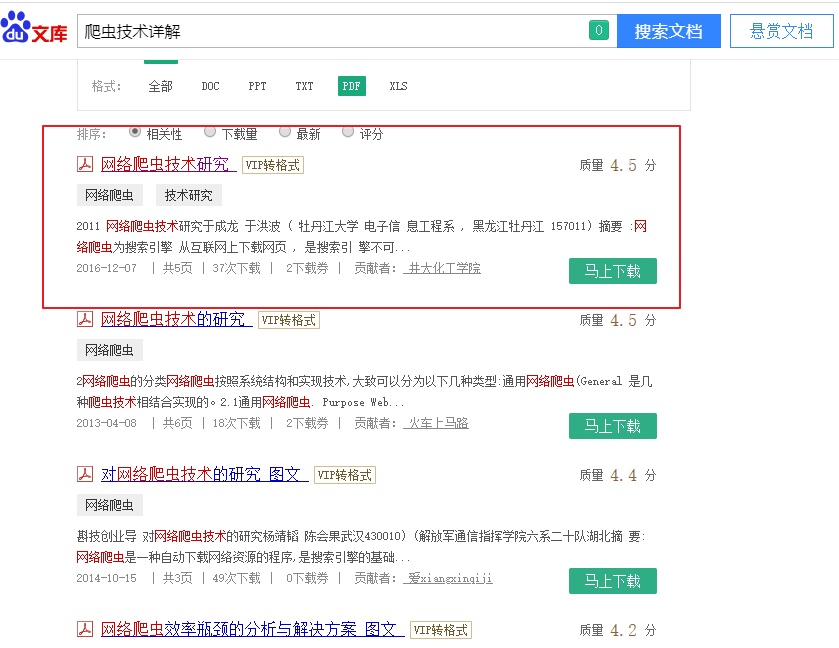

In [1]:
from IPython.display import Image
Image("./Images/pdf_0.png",width="600px",height="400px")

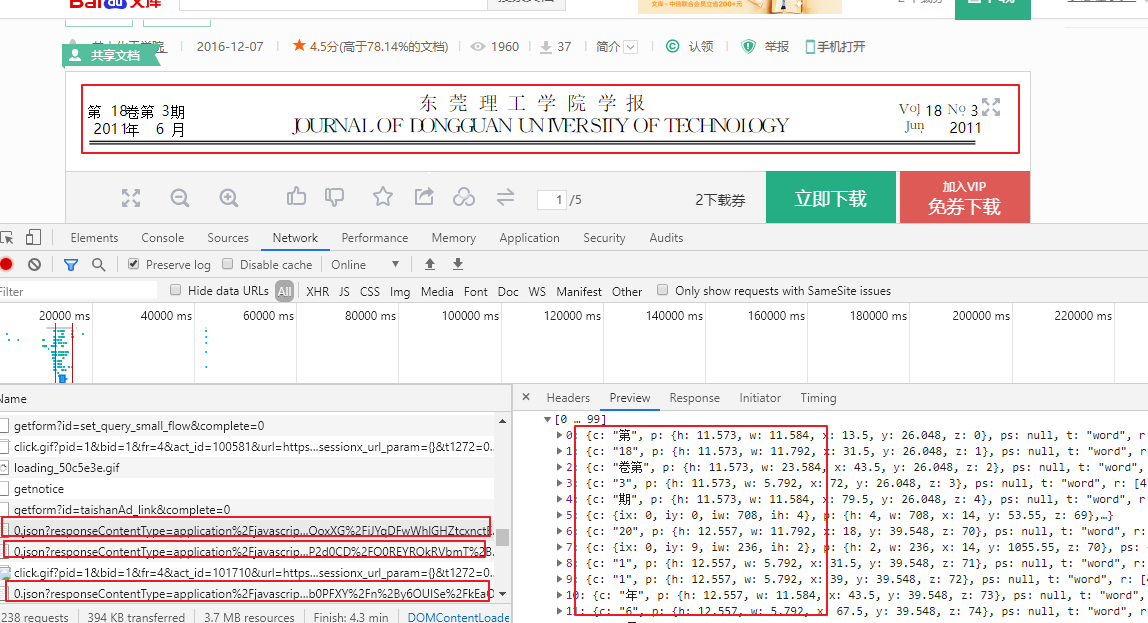

In [3]:
Image("./Images/pdf_1.png",width="600px",height="400px")

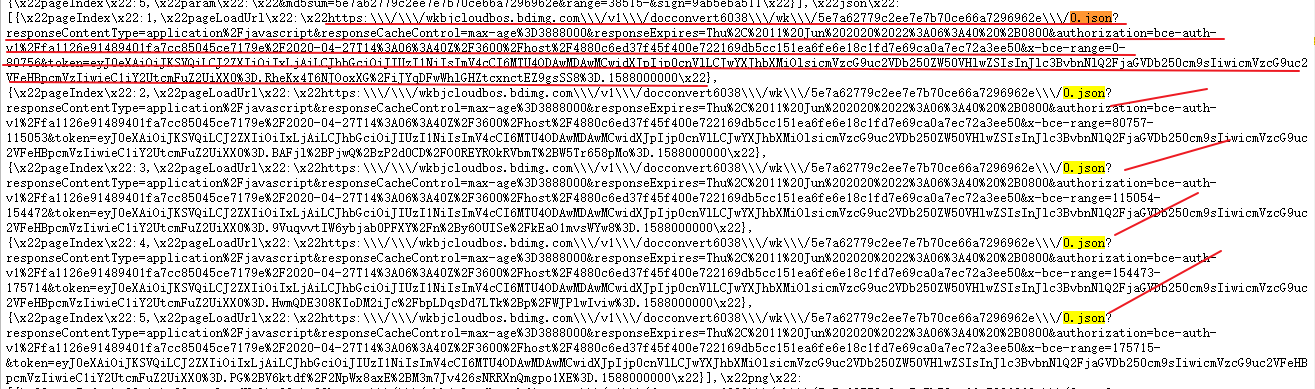

In [4]:
Image("./Images/pdf_2.png",width="600px",height="400px")

## 二.数据URL获取

In [5]:
import requests
import json
import re
import json

session=requests.session()

url=input("请输入下载的文件URL地址：")

content=session.get(url).content.decode('gbk')
doc_id=re.findall('view/(.*?).html',url)[0]
types=re.findall(r"docType.*?:.*?'(.*?)'",content)[0]
title=re.findall(r"title.*?:.*?'(.*?)'",content)[0]

请输入下载的文件URL地址： https://wenku.baidu.com/view/5fd3a55b3d1ec5da50e2524de518964bcf84d2b6.html?fr=search


In [24]:
title

'网络爬虫技术研究'

In [7]:
url_list=re.findall(r'(https.*?0.json.*?)\\x22}',content)
url_list=[addr.replace("\\\\\\/","/") for addr in url_list]

## 三.程序调试

In [9]:
result=""

for url in set(url_list):
    content=session.get(url).content.decode('gbk')
    
    y=0
    txtlists=re.findall(r'"c":"(.*?)".*?"y":(.*?),',content)
    for item in txtlists:
        # 当item[1]的值与前面不同时，代表要换行了
        if not y==item[1]:
            y=item[1]
            n='\n'
        else:
            n=''
        result+=n
        result+=item[0].encode('utf-8').decode('unicode_escape','ignore')

E:\Anaconda\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: invalid escape sequence '\/'
  app.launch_new_instance()


In [13]:
filename="./Files/"+title+'.txt'

with open(filename,'w',encoding="utf-8") as f:
    f.write(result)
    
f.close()

## 四.函数编程

### 1.功能完善

提供下载['txt','doc','pdf','ppt']文件

In [23]:
import requests
import json
import re
import os

session=requests.session()

path="F:\\桌面\\Files"

if not os.path.exists(path):
    os.mkdir(path)

def parse_txt1(code,doc_id):
    
    content_url='https://wenku.baidu.com/api/doc/getdocinfo?callback=cb&doc_id='+doc_id

    content=session.get(content_url).content.decode(code)
    md5sum=re.findall('"md5sum":"(.*?)",',content)[0]
    rsign=re.findall('"rsign":"(.*?)"',content)[0]
    pn=re.findall('"totalPageNum":"(.*?)"',content)[0]
    
    content_url='https://wkretype.bdimg.com/retype/text/'+doc_id+'?rn='+pn+'&type=txt'+md5sum+'&rsign='+rsign
    content=json.loads(session.get(content_url).content.decode('gbk'))
    
    result=''

    for item in content:
        for i in item['parags']:
            result+=i['c']
            
    return result

def parse_txt2(content,code,doc_id):
    md5sum=re.findall('"md5sum":"(.*?)",',content)[0]
    rsign=re.findall('"rsign":"(.*?)"',content)[0]
    pn=re.findall('"show_page":"(.*?)"',content)[0]
    
    content_url='https://wkretype.bdimg.com/retype/text/'+doc_id+'?rn='+pn+'&type=txt'+md5sum+'&rsign='+rsign
    content=json.loads(session.get(content_url).content.decode('utf-8'))
    
    result=''

    for item in content:
        for i in item['parags']:
            result+=i['c']
            
    return result

def parse_doc(content):
    
    url_list=re.findall(r'(https.*?0.json.*?)\\x22}',content)
    url_list=[addr.replace("\\\\\\/","/") for addr in url_list]
    
    result=""

    for url in set(url_list):
        content=session.get(url).content.decode('gbk')

        y=0
        txtlists=re.findall(r'"c":"(.*?)".*?"y":(.*?),',content)
        for item in txtlists:
            # 当item[1]的值与前面不同时，代表要换行了
            if not y==item[1]:
                y=item[1]
                n='\n'
            else:
                n=''
            result+=n
            result+=item[0].encode('utf-8').decode('unicode_escape','ignore')
    
    return result

def parse_pdf(content):
    
    url_list=re.findall(r'(https.*?0.json.*?)\\x22}',content)
    url_list=[addr.replace("\\\\\\/","/") for addr in url_list]
    
    result=""

    for url in set(url_list):
        content=session.get(url).content.decode('gbk')

        y=0
        txtlists=re.findall(r'"c":"(.*?)".*?"y":(.*?),',content)
        for item in txtlists:
            # 当item[1]的值与前面不同时，代表要换行了
            if not y==item[1]:
                y=item[1]
                n='\n'
            else:
                n=''
            result+=n
            result+=item[0].encode('utf-8').decode('unicode_escape','ignore')
    
    return result
    

def save_file(title,filename,content):
    
    with open(filename,'w',encoding='utf-8') as f:
        f.write(content)
        print("文件"+title+"保存成功")
    f.close()
    

def main():
    
    print("欢迎来到百度文库文件下载：")
    print("-----------------------\r\n")
     
    
    while True:
        try:
            print("1.doc \n 2.txt \n 3.ppt \n 4.xls\n 5.ppt\n")
            types=input("请输入需要下载文件的格式(0退出)：")

            if types=="0":
                break

            if types not in ['txt','doc','pdf']:
                print("抱歉功能尚未开发")
                continue


            url=input("请输入下载的文库URL地址：")

            # 网页内容
            response=session.get(url)

            code=re.findall('charset=(.*?)"',response.text)[0]

            if code.lower()!='utf-8':
                code='gbk'

            content=response.content.decode(code)

            # 文件id
            doc_id=re.findall('view/(.*?).html',url)[0]
            # 文件类型
            #types=re.findall(r"docType.*?:.*?'(.*?)'",content)[0]
            # 文件主题
            #title=re.findall(r"title.*?:.*?'(.*?)'",content)[0]

            if types=='txt':
                md5sum=re.findall('"md5sum":"(.*?)",',content)
                if md5sum!=[]:
                    result=parse_txt2(content,code,doc_id)
                    title=re.findall(r'<title>(.*?). ',content)[0]
                    #filename=os.getcwd()+"\\Files\\"+title+'.txt'
                    filename=path+"\\"+title+".txt"
                    save_file(title,filename,result)
                else: 
                    result=parse_txt1(code,doc_id)
                    title=re.findall(r"title.*?:.*?'(.*?)'",content)[0]
                    #filename=os.getcwd()+"\\Files\\"+title+'.txt'
                    filename=path+"\\"+title+".txt"
                    save_file(title,filename,result)
            elif types=='doc':
                title=re.findall(r"title.*?:.*?'(.*?)'",content)[0]
                result=parse_doc(content)
                filename=path+"\\"+title+".doc"
                save_file(title,filename,result)
            elif types=='pdf':
                title=re.findall(r"title.*?:.*?'(.*?)'",content)[0]
                result=parse_pdf(content)
                filename=path+"\\"+title+".txt"
                save_file(title,filename,result)
                
                
        except Exception as e:
            print(e)


if __name__=='__main__':
    main()

欢迎来到百度文库文件下载：
-----------------------

1.doc 
 2.txt 
 3.ppt 
 4.xls
 5.ppt



请输入需要下载文件的格式(0退出)： pdf
请输入下载的文库URL地址： https://wenku.baidu.com/view/5fd3a55b3d1ec5da50e2524de518964bcf84d2b6.html?fr=search


E:\Anaconda\envs\mypython\lib\site-packages\ipykernel_launcher.py:93: DeprecationWarning: invalid escape sequence '\/'


文件网络爬虫技术研究保存成功
1.doc 
 2.txt 
 3.ppt 
 4.xls
 5.ppt



请输入需要下载文件的格式(0退出)： 0
